In [1]:
#### importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("C:/Data Science/24 july/Decision Tree  - Assignment -4/iphone_purchase_records.csv")
df

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [3]:
##### data preprocessing

In [4]:
def preprocessing(df):
    columns=df.shape[1]
    print('Total no of columns are : ',columns)
    rows=df.shape[0]
    print('Total no of rows are : ', rows)
    total_miss=df.isnull().sum()
    print('Total missings are :\n',total_miss)
    datatypes=df.dtypes
    print('Total datatyes are :\n',datatypes)
    return df

In [5]:
preprocessing(df)

Total no of columns are :  4
Total no of rows are :  400
Total missings are :
 Gender             0
Age                0
Salary             0
Purchase Iphone    0
dtype: int64
Total datatyes are :
 Gender             object
Age                 int64
Salary              int64
Purchase Iphone     int64
dtype: object


,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [6]:
#####Exploratory data analyis

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,400,2,Female,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,400.0,NaN,NaN,NaN,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
Salary,400.0,NaN,NaN,NaN,69742.5,34096.960282,15000.0,43000.0,70000.0,88000.0,150000.0
Purchase Iphone,400.0,NaN,NaN,NaN,0.3575,0.479864,0.0,0.0,0.0,1.0,1.0


In [8]:
df['Age'].mean(),df['Salary'].mean()

(37.655, 69742.5)

In [9]:
df['Age'].median(),df['Salary'].median()

(37.0, 70000.0)

In [10]:
df['Gender'].mode()

0    Female
Name: Gender, dtype: object

In [11]:
df['Age'].std(),df['Salary'].std()

(10.48287659730792, 34096.960282424785)

In [12]:
df['Age'].var(),df['Salary'].var()

(109.89070175438606, 1162602700.5012531)

In [13]:
df['Age'].min(),df['Salary'].min()

(18, 15000)

In [14]:
df['Age'].max(),df['Salary'].max()

(60, 150000)

In [15]:
df['Age'].skew(),df['Salary'].skew()

(0.23133746309642822, 0.49502362888993623)

In [16]:
####---- from above it is clear that the dataset is normally distributed as column age and salary have skew near to zero 
####---- and mean and median are almost equal(37)
####---- mode in gender column is female (maximim occurance)
####---- so we can use Standerscalar for scaling during feature engineering

In [17]:
####-Outlier analysis

<AxesSubplot:>

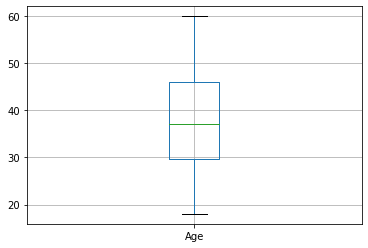

In [18]:
df.boxplot(column='Age')

<AxesSubplot:>

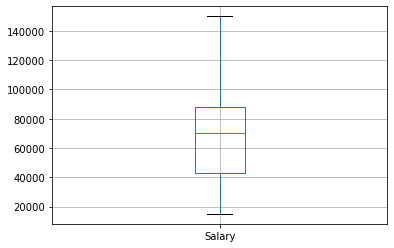

In [19]:
df.boxplot(column='Salary')

In [20]:
####---- there no outlier in the dataset columns

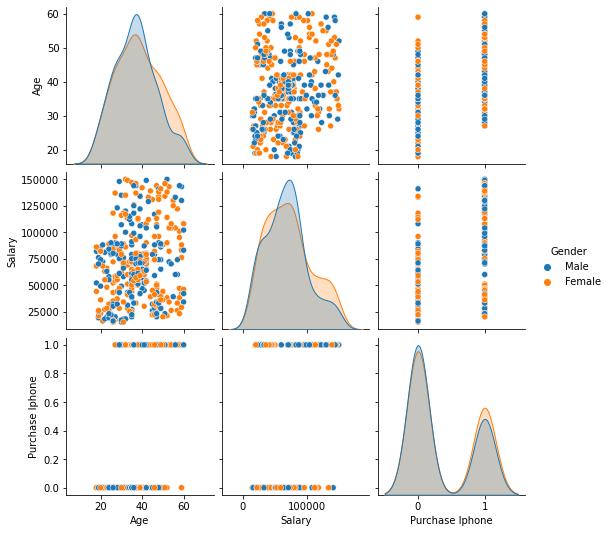

In [21]:
sns.pairplot(df,hue='Gender')

In [22]:
df.corr()

,Age,Salary,Purchase Iphone
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Purchase Iphone,0.622454,0.362083,1.000000


In [23]:
####---- from above it found that the age and salary have strong relation in purchaching i-phone

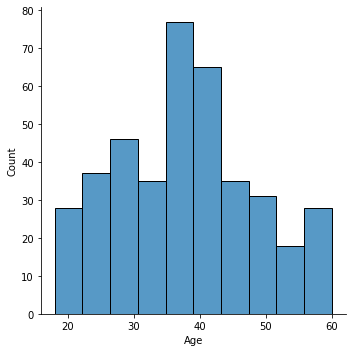

In [24]:
sns.displot(x='Age',data=df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

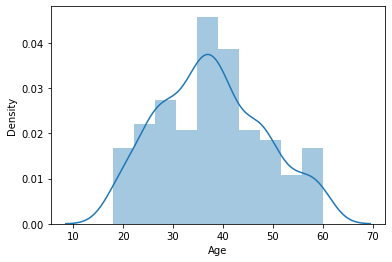

In [25]:
sns.distplot(df['Age'])

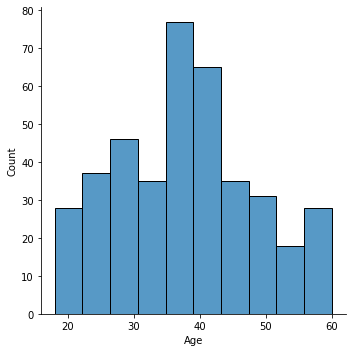

In [26]:
sns.displot(x='Age',data=df)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

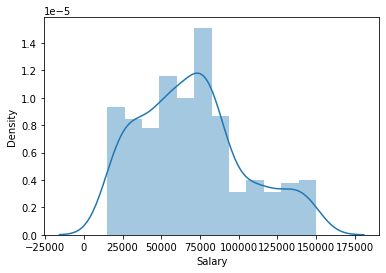

In [27]:
sns.distplot(df['Salary'])

In [28]:
bins=[18,27,36,45,54,63]
df['Age_bin']=pd.cut(df['Age'],bins=bins,labels=['18-26','27-35','36-44','45-53','53 and above'])

In [29]:
a=df.groupby('Age_bin').size()
a

Age_bin
18-26            73
27-35           112
36-44           107
45-53            72
53 and above     31
dtype: int64

<AxesSubplot:xlabel='Age_bin'>

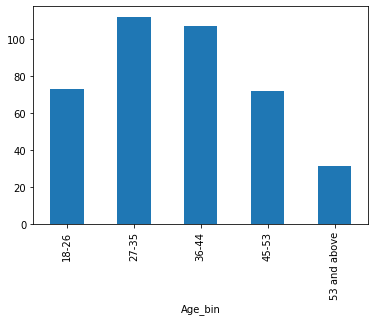

In [30]:
a.plot(kind='bar')

In [31]:
b=df.groupby(['Age_bin','Gender']).size().reset_index()
b

,Age_bin,Gender,0
0,18-26,Female,36
1,18-26,Male,37
2,27-35,Female,53
3,27-35,Male,59
4,36-44,Female,51
5,36-44,Male,56
6,45-53,Female,43
7,45-53,Male,29
8,53 and above,Female,18
9,53 and above,Male,13


<AxesSubplot:xlabel='Age_bin', ylabel='0'>

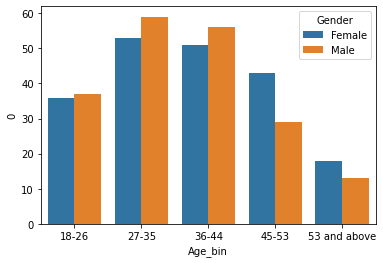

In [32]:
sns.barplot(x='Age_bin',y=0,hue='Gender',data=b)

In [33]:
####---- mapping male =1, female=0

In [34]:
d={'Male':1,'Female':0}
df['Gender']=df['Gender'].map(d)

In [35]:
df

,Gender,Age,Salary,Purchase Iphone,Age_bin
0,1,19,19000,0,18-26
1,1,35,20000,0,27-35
2,0,26,43000,0,18-26
3,0,27,57000,0,18-26
4,1,19,76000,0,18-26
...,...,...,...,...,...
395,0,46,41000,1,45-53
396,1,51,23000,1,45-53
397,0,50,20000,1,45-53
398,1,36,33000,0,27-35


In [36]:
####---- Feature engineering
X_train=df.iloc[:,0:3]
X_train

,Gender,Age,Salary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [37]:
y=df['Purchase Iphone']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scalar=StandardScaler()

In [40]:
X=scalar.fit_transform(X_train)
X

array([[ 1.02020406, -1.78179743, -1.49004624],
       [ 1.02020406, -0.25358736, -1.46068138],
       [-0.98019606, -1.11320552, -0.78528968],
       ...,
       [-0.98019606,  1.17910958, -1.46068138],
       [ 1.02020406, -0.15807423, -1.07893824],
       [-0.98019606,  1.08359645, -0.99084367]])

In [41]:
#####----- Model building

In [42]:
def decision_tree(x,y):
    model=DecisionTreeClassifier(criterion='entropy')
    model_train=model.fit(x,y)
    pred=model_train.predict(x)
    return pred
    

In [43]:
pred=decision_tree(X,y)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,precision_score

In [45]:
cf=confusion_matrix(y,pred)
cf

array([[257,   0],
       [  1, 142]], dtype=int64)

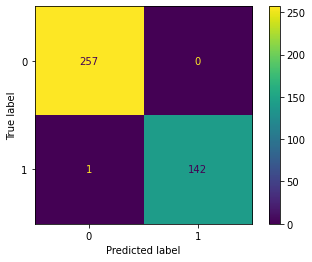

In [46]:
a=ConfusionMatrixDisplay(cf, display_labels=None)
a.plot()

<AxesSubplot:>

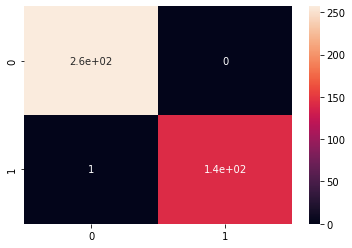

In [47]:
sns.heatmap(cf,annot=True)

In [48]:
accuracy_score(y,pred)

0.9975

In [49]:
error=1-accuracy_score(y,pred)
error

0.0024999999999999467

In [50]:
precision_score(y,pred)

1.0